### Entrega atividade 1: Pré-processamento de dados

#### Coleta de dados:
- Escolha do período dos dados
- Coleta dos dados nos seguintes períodos

#### Limpeza e Organização dos dados:
- Remoção de dados desnecessários
- Transformação nos tipos de dados
- Verificação de falta de dados

#### Análise simples estatísticas sobre os dados

Para a coleta, utilizou-se a biblioteca `yfinance` e o CSV fornecido pelo site da B3.com.br sobre o índice IBOVESPA.

#### Instalação bibliotecas

In [162]:
pip install squarify

#### Imports

In [163]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify

#### Pré-processamento de dados

##### Obter dados:

In [ ]:
# Carrega o arquivo CSV em DF_Acoes_IBOV, contendo a carteira de ações da ibovespa
DF_Acoes_IBOV = pd.read_csv('/content/Data/ArqB.csv', delimiter=';', index_col=False)

display(DF_Acoes_IBOV)

In [165]:
def pega_historico(codigo, comeco, fim, intervalo):

    # Cria um objeto Ticker para a ação especificada
    index = yf.Ticker(codigo + '.SA')

    try:
        # Busca o histórico de preços da ação no intervalo e datas especificadas
        historico = index.history(interval=intervalo, start=comeco, end=fim)

        # Restaura o índice como uma coluna, para que a data fique acessível
        historico.reset_index(inplace=True)

        # Adiciona uma coluna com o código da ação para identificação
        historico['Codigo'] = codigo

    except Exception as e:
        # Imprime uma mensagem de erro se houver problemas ao buscar os dados
        print(f"Erro ao buscar: {codigo}")

    # Retorna o DataFrame
    return historico

In [ ]:
# Cria um DataFrame vazio com as colunas especificadas
DF_Acoes = pd.DataFrame(columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Codigo'])

# Define os períodos para os quais os dados serão coletados
periodos = [
    ('2004-01-01', '2005-12-31'),
    ('2008-01-01', '2009-12-31'),
    ('2024-01-01', datetime.today().strftime('%Y-%m-%d'))  # Até a data de hoje
]

# Define o intervalo de coleta dos dados
intervalo = '1d'

# Loop para cada ação no DataFrame DF_Acoes_IBOV
for acao in DF_Acoes_IBOV['Codigo']:
    for comeco, fim in periodos:
        # Chama a função pega_historico para obter o histórico da ação no período definido
        hist_acao = pega_historico(acao, comeco, fim, intervalo)

        # Verifica se o DataFrame retornado não está vazio antes de concatenar
        if not hist_acao.empty:
            # Concatena os dados obtidos ao DataFrame DF_Acoes, ignorando o índice
            DF_Acoes = pd.concat([DF_Acoes, hist_acao], ignore_index=True)

##### Limpeza e organização dos dados:

In [ ]:
# Lista de colunas que não queremos manter no DataFrame
colunas_que_n_queremos = ['Open', 'High', 'Low', 'Dividends', 'Stock Splits']

try:
    # Itera sobre cada coluna na lista de colunas a serem removidas
    for coluna in colunas_que_n_queremos:
        # Remove a coluna do DataFrame
        DF_Acoes = DF_Acoes.drop(columns=[coluna])
# Captura e imprime um erro, se ocorrer durante a remoção
except Exception as e:
    print(f"Ocorreu o erro: {e}")

display(DF_Acoes)


In [ ]:
#Transformação de dados, data e volume
try:
    # Converte a coluna 'Date' para o formato de data
    DF_Acoes['Date'] = pd.to_datetime(DF_Acoes['Date'], format='%d/%m/%Y')
    # Converte a coluna 'Volume' para o tipo inteiro
    DF_Acoes['Volume'] = DF_Acoes['Volume'].astype(int)
# Captura e imprime um erro, se ocorrer durante a transformação
except Exception as e:
    print("Erro: " + str(e))

# Exibe o DataFrame DF_Acoes atualizado
display(DF_Acoes)

In [ ]:
# Lista de colunas que não queremos manter no DataFrame DF_Acoes_IBOV
colunas_que_n_queremos = ['Tipo', 'Qtde. Teorica', 'Acao']

try:
    for coluna in colunas_que_n_queremos:
        # Remove a coluna do DataFrame DF_Acoes_IBOV
        DF_Acoes_IBOV = DF_Acoes_IBOV.drop(columns=[coluna])
except Exception as e:
    print(f"Ocorreu o erro: {e}")

# Tenta substituir vírgulas por pontos na coluna 'Participacao' e converter para float
try:
    DF_Acoes_IBOV['Participacao'] = DF_Acoes_IBOV['Participacao'].str.replace(',', '.').astype(float)
except Exception as e:
    print(f"Ocorreu o erro: {e}")

print(DF_Acoes_IBOV['Participacao'].sum())

display(DF_Acoes_IBOV)

##### Contagem de dados:

In [ ]:
# Conta a quantidade de códigos únicos por data e armazena em um novo DataFrame
contagem_por_data = DF_Acoes.groupby('Date')['Codigo'].nunique().reset_index(name='Quantidade_Codigos')

# Conta a quantidade de datas únicas por código e armazena em um novo DataFrame
contagem_por_codigo = DF_Acoes.groupby('Codigo')['Date'].nunique().reset_index(name='Quantidade_Datas')

# Exibe os resultados da contagem de códigos por data
print("Contagem de códigos por data:")
print(contagem_por_data)

# Exibe os resultados da contagem de datas por código
print("\nContagem de datas por código:")
print(contagem_por_codigo)

##### Media e mediana:

###### Por acao:

In [ ]:
# Calcula a média e mediana do preço de fechamento por código
estatisticas_por_codigo = DF_Acoes.groupby('Codigo')['Close'].agg(['mean', 'median']).reset_index()

# Renomeia as colunas para melhor legibilidade
estatisticas_por_codigo.columns = ['Codigo', 'Media_Preco_Fechamento', 'Mediana_Preco_Fechamento']

# Exibe as estatísticas de preço de fechamento por código
print("\nEstatísticas de Preço de Fechamento por Código:")
print(estatisticas_por_codigo)

###### Por periodo:

In [172]:
# Cria listas de anos para cada período
anos_periodo1 = [f'200{i}' for i in range(4, 6)]  # Anos de 2004 a 2005
anos_periodo2 = [f'200{i}' for i in range(8, 10)]  # Anos de 2008 a 2009
anos_periodo3 = [f'202{i}' for i in range(4, 5)] + [datetime.today().strftime('%Y')]  # Anos de 2024 até o ano atual

# Cria um dicionário para armazenar as medianas e médias
estatisticas_precos = {
    '2004-2005': {'mediana': [], 'media': []},
    '2008-2009': {'mediana': [], 'media': []},
    '2024-hoje': {'mediana': [], 'media': []}
}

# Função para calcular a mediana e a média do preço de fechamento
def calcular_estatisticas_preco(anos, periodo):
    for ano in anos:
        # Filtra os dados para o ano atual
        dados_ano = DF_Acoes[(DF_Acoes['Date'] >= f'{ano}-01-01') & (DF_Acoes['Date'] <= f'{ano}-12-31')]

        if not dados_ano.empty:
            # Calcula a mediana e média do preço de fechamento
            mediana_preco = dados_ano['Close'].median()
            media_preco = dados_ano['Close'].mean()
            # Armazena os resultados no dicionário
            estatisticas_precos[periodo]['mediana'].append(mediana_preco)
            estatisticas_precos[periodo]['media'].append(media_preco)
        else:
            # Informa se não há dados para o ano atual
            print(f"Nenhum dado para o ano {ano} no período {periodo}.")
            estatisticas_precos[periodo]['mediana'].append(0)  # Se não houver dados
            estatisticas_precos[periodo]['media'].append(0)

# Calcula estatísticas de preço de fechamento para cada período
calcular_estatisticas_preco(anos_periodo1, '2004-2005')
calcular_estatisticas_preco(anos_periodo2, '2008-2009')
calcular_estatisticas_preco(anos_periodo3, '2024-hoje')

# Exibe as estatísticas calculadas
print("\nEstatísticas de Preço de Fechamento Calculadas:")
for periodo, estatisticas in estatisticas_precos.items():
    # Compacta anos e estatísticas para exibir os resultados
    for ano, (mediana, media) in zip(anos_periodo1 + anos_periodo2 + anos_periodo3, zip(estatisticas['mediana'], estatisticas['media'])):
        print(f"Ano: {ano}, Período: {periodo}, Mediana do Preço de Fechamento: {mediana}, Média do Preço de Fechamento: {media}")



Estatísticas de Preço de Fechamento Calculadas:
Ano: 2004, Período: 2004-2005, Mediana do Preço de Fechamento: 3.1589112281799316, Média do Preço de Fechamento: 109459.01043676071
Ano: 2005, Período: 2004-2005, Mediana do Preço de Fechamento: 3.5946106910705566, Média do Preço de Fechamento: 109483.84410481926
Ano: 2004, Período: 2008-2009, Mediana do Preço de Fechamento: 4.899017333984375, Média do Preço de Fechamento: 8.770291541487627
Ano: 2005, Período: 2008-2009, Mediana do Preço de Fechamento: 4.507693290710449, Média do Preço de Fechamento: 6.895838315080728
Ano: 2004, Período: 2024-hoje, Mediana do Preço de Fechamento: 19.148935317993164, Média do Preço de Fechamento: 22.646462235270498
Ano: 2005, Período: 2024-hoje, Mediana do Preço de Fechamento: 19.148935317993164, Média do Preço de Fechamento: 22.646462235270498


##### Graficos:

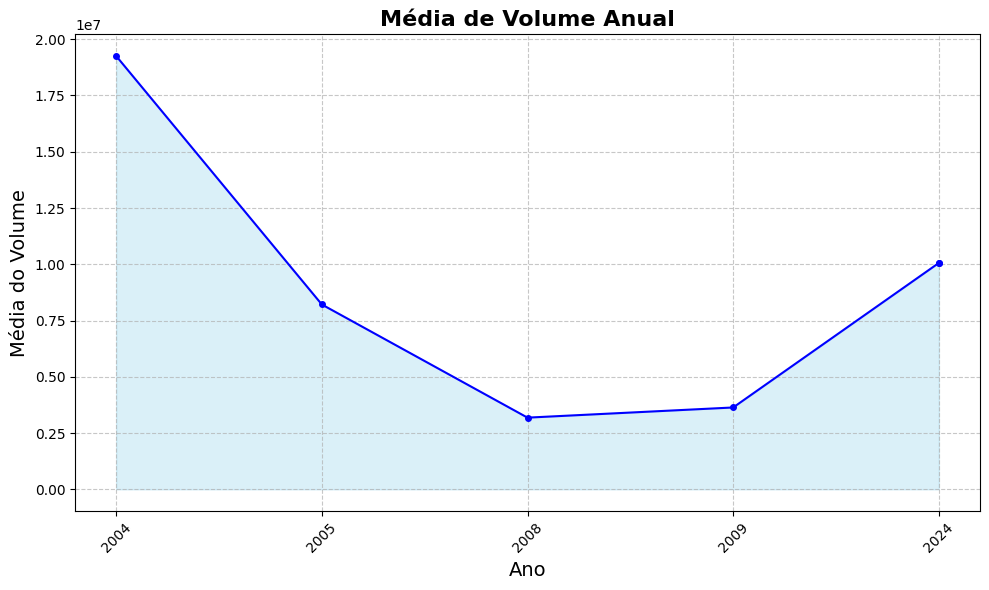

In [173]:
# Criar listas de anos para cada período
anos_periodo1 = [f'200{i}' for i in range(4, 6)]  # 2004, 2005
anos_periodo2 = [f'200{i}' for i in range(8, 10)]  # 2008, 2009
anos_periodo3 = [f'202{i}' for i in range(4, 5)] + [datetime.today().strftime('%Y')]  # 2024 até hoje

# Criar uma lista para armazenar as médias
media_volumes = {
    '2004-2005': [],
    '2008-2009': [],
    '2024-hoje': []
}

# Função para calcular a média de volume
def calcular_media_volume(anos, periodo):
    for ano in anos:
        dados_ano = DF_Acoes[(DF_Acoes['Date'] >= f'{ano}-01-01') & (DF_Acoes['Date'] <= f'{ano}-12-31')]
        if not dados_ano.empty:
            media_volume = dados_ano['Volume'].sum() / len(dados_ano['Volume'])
            media_volumes[periodo].append(media_volume)
        else:
            print(f"Nenhum dado para o ano {ano} no período {periodo}.")
            media_volumes[periodo].append(0)  # Se não houver dados

# Calcular média de volume para cada período
calcular_media_volume(anos_periodo1, '2004-2005')
calcular_media_volume(anos_periodo2, '2008-2009')
calcular_media_volume(anos_periodo3, '2024-hoje')

# Preparar dados para o gráfico
anos = anos_periodo1 + anos_periodo2 + anos_periodo3
teste = media_volumes['2004-2005'] + media_volumes['2008-2009'] + media_volumes['2024-hoje']

# Configuração do gráfico
plt.figure(figsize=(10, 6))
plt.plot(anos, teste, marker='o', color='b', linestyle='-', linewidth=1.5, markersize=4)
plt.fill_between(anos, teste, color="skyblue", alpha=0.3)

# Customizações
plt.title("Média de Volume Anual", fontsize=16, fontweight='bold')
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Média do Volume", fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()



Nenhum dado para 2004-12 no período 2004-2005.
Nenhum dado para 2005-12 no período 2004-2005.
Nenhum dado para 2008-12 no período 2008-2009.
Nenhum dado para 2009-12 no período 2008-2009.
Nenhum dado para 2024-11 no período 2024-hoje.
Nenhum dado para 2024-12 no período 2024-hoje.
Nenhum dado para 2024-11 no período 2024-hoje.
Nenhum dado para 2024-12 no período 2024-hoje.


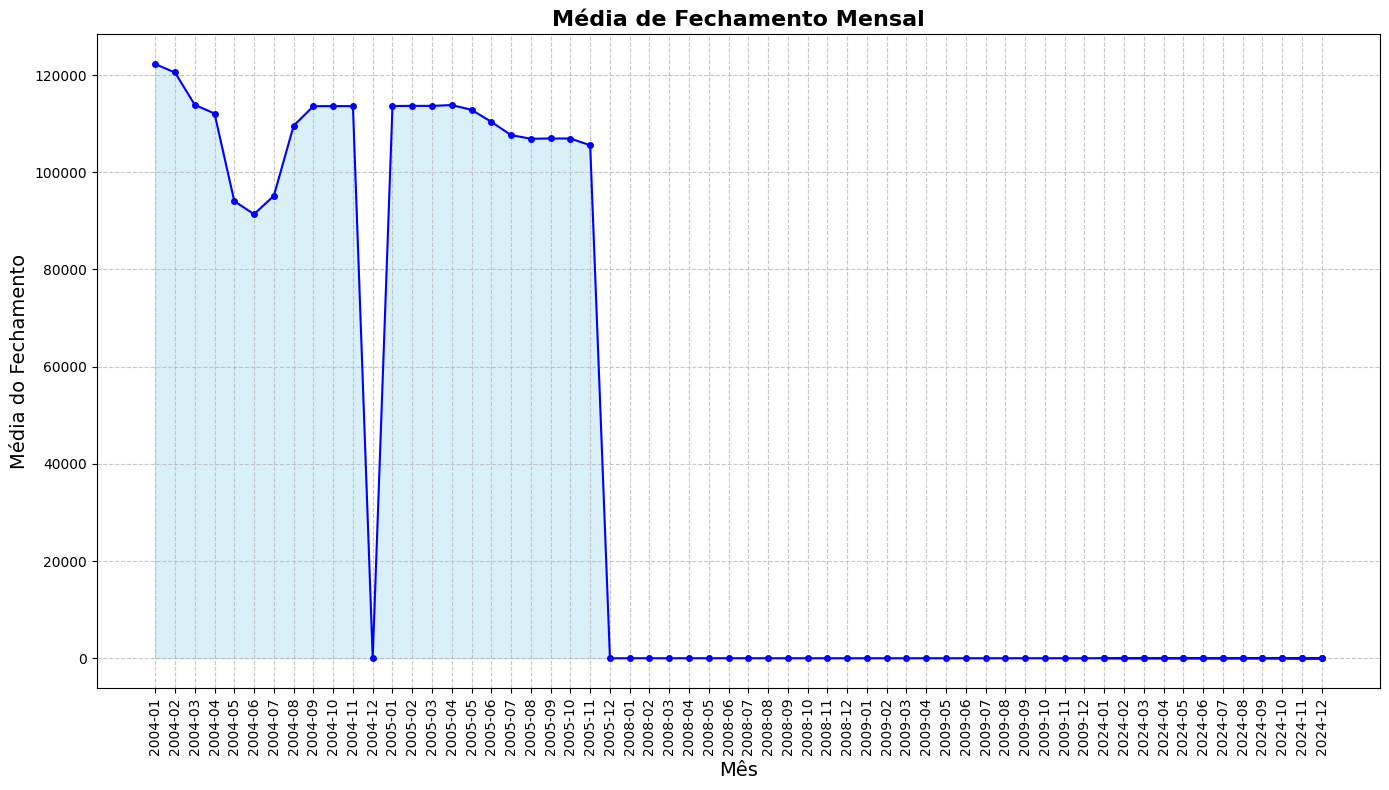

In [174]:
# Criar listas de anos para cada período
anos_periodo1 = [f'200{i}' for i in range(4, 6)]  # 2004, 2005
anos_periodo2 = [f'200{i}' for i in range(8, 10)]  # 2008, 2009
anos_periodo3 = [f'202{i}' for i in range(4, 5)] + [datetime.today().strftime('%Y')]  # 2024 até hoje

# Criar um dicionário para armazenar as médias mensais
media_mensal_closes = {
    '2004-2005': [],
    '2008-2009': [],
    '2024-hoje': []
}

# Função para calcular a média mensal de fechamento
def calcular_media_mensal_close(anos, periodo):
    for ano in anos:
        for mes in range(1, 13):
            primeiro_dia = datetime(int(ano), mes, 1)
            ultimo_dia = (primeiro_dia.replace(month=mes % 12 + 1, day=1) - timedelta(days=1)).date()  # Último dia do mês
            dados_mes = DF_Acoes[
                (DF_Acoes['Date'] >= f'{primeiro_dia.date()}') &
                (DF_Acoes['Date'] <= f'{ultimo_dia}')
            ]
            if not dados_mes.empty:
                media_close = dados_mes['Close'].sum() / len(dados_mes['Close'])
                media_mensal_closes[periodo].append(media_close)
            else:
                print(f"Nenhum dado para {ano}-{mes:02d} no período {periodo}.")
                media_mensal_closes[periodo].append(0)  # Se não houver dados

# Calcular média mensal de fechamento para cada período
calcular_media_mensal_close(anos_periodo1, '2004-2005')
calcular_media_mensal_close(anos_periodo2, '2008-2009')
calcular_media_mensal_close(anos_periodo3, '2024-hoje')

# Preparar dados para o gráfico
meses = (
    [f'{ano}-{mes:02d}' for ano in anos_periodo1 for mes in range(1, 13)] +
    [f'{ano}-{mes:02d}' for ano in anos_periodo2 for mes in range(1, 13)] +
    [f'{ano}-{mes:02d}' for ano in anos_periodo3 for mes in range(1, 13)]
)
valores_mensais = (
    media_mensal_closes['2004-2005'] +
    media_mensal_closes['2008-2009'] +
    media_mensal_closes['2024-hoje']
)

# Configuração do gráfico
plt.figure(figsize=(14, 8))
plt.plot(meses, valores_mensais, marker='o', color='b', linestyle='-', linewidth=1.5, markersize=4)
plt.fill_between(meses, valores_mensais, color="skyblue", alpha=0.3)

# Customizações
plt.title("Média de Fechamento Mensal", fontsize=16, fontweight='bold')
plt.xlabel("Mês", fontsize=14)
plt.ylabel("Média do Fechamento", fontsize=14)
plt.xticks(rotation=90)
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Ajuste e exibição do gráfico
plt.tight_layout()
plt.show()

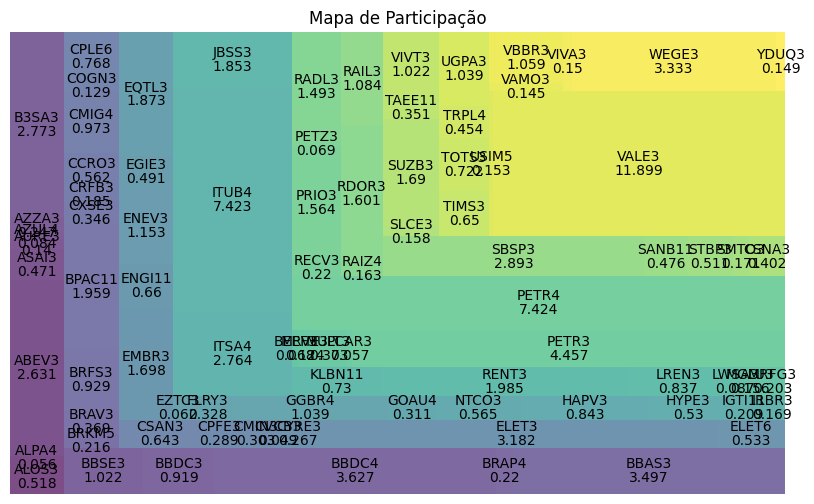

In [175]:
DF_Acoes_IBOV

# Configurando o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Definindo cores para cada categoria
cores = plt.cm.viridis(np.linspace(0, 1, len(DF_Acoes_IBOV)))  # Usando a paleta 'viridis'

# Criando o treemap
squarify.plot(sizes=DF_Acoes_IBOV['Participacao'],
              label=DF_Acoes_IBOV['Codigo'],
              alpha=0.7,
              color=cores,  # Usando as cores definidas
              value=DF_Acoes_IBOV['Participacao'])

# Adicionando título
plt.title('Mapa de Participação')

# Exibindo o gráfico
plt.axis('off')  # Remove os eixos
plt.show()

<ipython-input-177-cd7f5eb34c5d>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=DF_Acoes_periodos, x='Periodo', y='Close', palette="viridis")


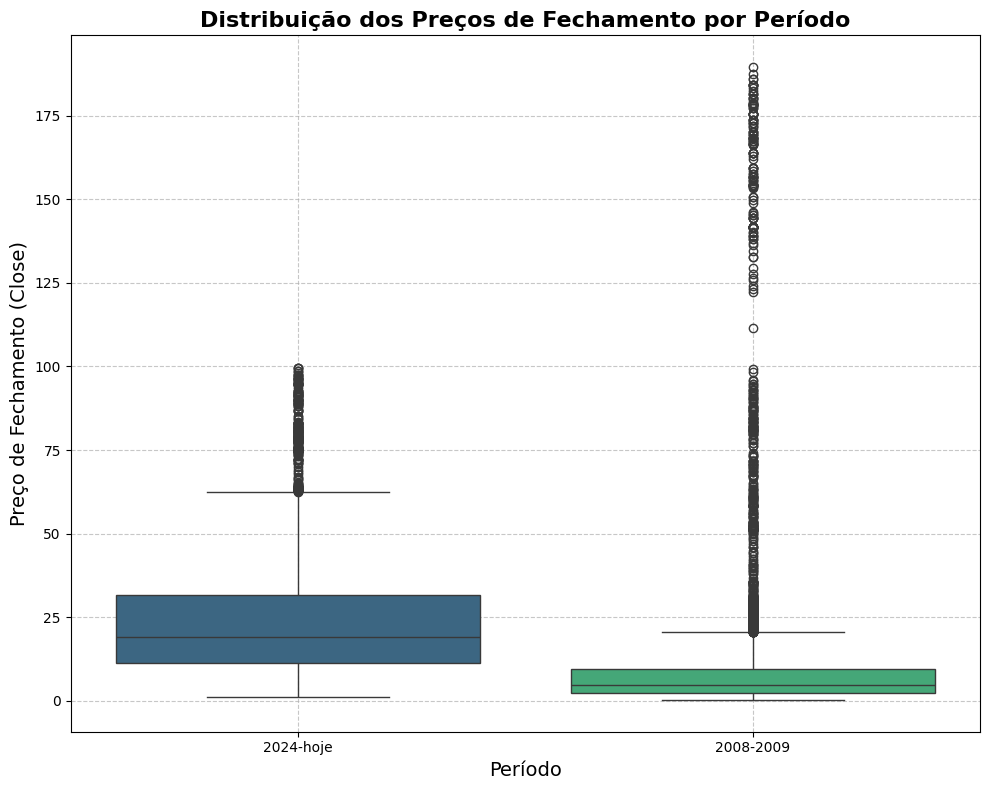

In [177]:

# Remover timezone da coluna 'Date'
DF_Acoes['Date'] = DF_Acoes['Date'].dt.tz_localize(None)

# Definir períodos com base em intervalos de datas, convertendo as datas para Timestamp
def definir_periodo(data):
    if pd.to_datetime('2004-01-01') <= data <= pd.to_datetime('2005-12-31'):
        return None #Para melhorar o grafico
    elif pd.to_datetime('2008-01-01') <= data <= pd.to_datetime('2009-12-31'):
        return '2008-2009'
    elif pd.to_datetime('2024-01-01') <= data <= pd.to_datetime(datetime.today().strftime('%Y-%m-%d')):
        return '2024-hoje'
    else:
        return 'Outro'  # Caso deseje ignorar datas fora dos períodos

# Aplicar a função para criar a coluna 'Periodo'
DF_Acoes['Periodo'] = DF_Acoes['Date'].apply(definir_periodo)

# Filtrar para incluir apenas os períodos de interesse
DF_Acoes_periodos = DF_Acoes[DF_Acoes['Periodo'] != 'Outro']

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Gerar o boxplot dos preços de fechamento por período
sns.boxplot(data=DF_Acoes_periodos, x='Periodo', y='Close', palette="viridis")

# Customizações do gráfico
plt.title("Distribuição dos Preços de Fechamento por Período", fontsize=16, fontweight='bold')
plt.xlabel("Período", fontsize=14)
plt.ylabel("Preço de Fechamento (Close)", fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()


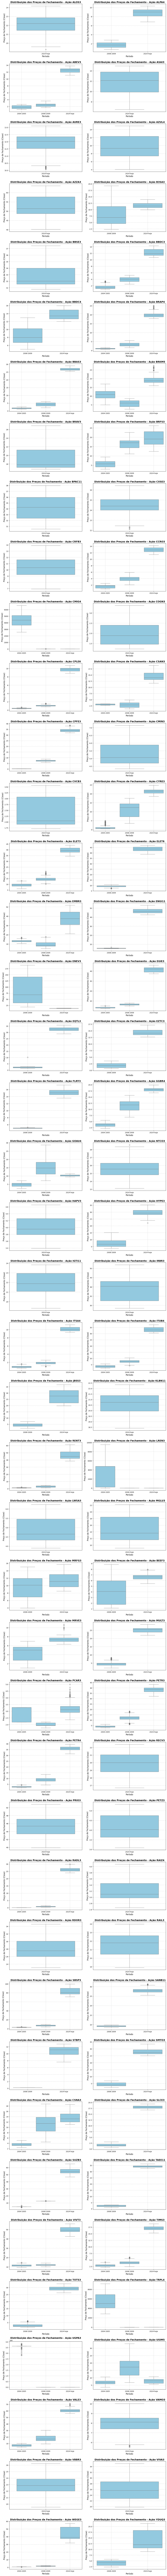

In [178]:
# Remover timezone da coluna 'Date', se houver
DF_Acoes['Date'] = DF_Acoes['Date'].dt.tz_localize(None)

# Definir períodos com base em intervalos de datas
def definir_periodo(data):
    if pd.to_datetime('2004-01-01') <= data <= pd.to_datetime('2005-12-31'):
        return '2004-2005'
    elif pd.to_datetime('2008-01-01') <= data <= pd.to_datetime('2009-12-31'):
        return '2008-2009'
    elif pd.to_datetime('2024-01-01') <= data <= pd.to_datetime(datetime.today().strftime('%Y-%m-%d')):
        return '2024-hoje'
    else:
        return 'Outro'  # Para ignorar datas fora dos períodos

# Aplicar a função para criar a coluna 'Periodo'
DF_Acoes['Periodo'] = DF_Acoes['Date'].apply(definir_periodo)

# Filtrar para incluir apenas os períodos de interesse
DF_Acoes_periodos = DF_Acoes[DF_Acoes['Periodo'] != 'Outro']

# Obter lista de ações únicas
codigos_unicos = DF_Acoes_periodos['Codigo'].unique()

# Configurar a grade dos subplots (2 colunas para melhor visualização)
num_graficos = len(codigos_unicos)
num_colunas = 2
num_linhas = (num_graficos + 1) // num_colunas

# Configurar o tamanho do gráfico
fig, axes = plt.subplots(num_linhas, num_colunas, figsize=(14, 5 * num_linhas))
axes = axes.flatten()

# Gerar um boxplot para cada ação
for i, codigo in enumerate(codigos_unicos):
    # Filtrar dados para o código de ação atual
    dados_acao = DF_Acoes_periodos[DF_Acoes_periodos['Codigo'] == codigo]

    # Gerar boxplot sem passar a paleta
    sns.boxplot(data=dados_acao, x='Periodo', y='Close', ax=axes[i], color='skyblue')

    # Customizações do gráfico individual
    axes[i].set_title(f"Distribuição dos Preços de Fechamento - Ação {codigo}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Período", fontsize=12)
    axes[i].set_ylabel("Preço de Fechamento (Close)", fontsize=12)
    axes[i].grid(visible=True, linestyle='--', alpha=0.7)

# Remover gráficos vazios caso o número de ações seja ímpar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar layout geral
plt.tight_layout()
plt.show()